In [1]:
import pandas as pd

f_df = pd.read_csv('./datasets/flight.csv')
f_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
pre_f_df = f_df.drop(labels=['Unnamed: 0'], axis=1)
pre_f_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 순서 정의
class_order = np.array(['Economy', 'Business'])
time_order = np.array(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
stops_order = np.array(['zero', 'one', 'two_or_more'])

# 라벨 인코딩할 열 목록
columns_to_encode = ['class', 'departure_time', 'arrival_time', 'stops']

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# 라벨 인코딩 수행
for column in columns_to_encode:
    if column == 'class':
        encoder.classes_ = class_order
    elif column in ['departure_time', 'arrival_time']:
        encoder.classes_ = time_order
    elif column == 'stops':
        encoder.classes_ = stops_order
    result = encoder.transform(pre_f_df[column])
    pre_f_df.loc[:, column] = result
    pre_f_df[column] = pre_f_df[column].astype(np.int16)

pre_f_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1,1,3,Hyderabad,1,10.08,49,69265
300149,Vistara,UK-826,Chennai,2,1,4,Hyderabad,1,10.42,49,77105
300150,Vistara,UK-832,Chennai,0,1,4,Hyderabad,1,13.83,49,79099
300151,Vistara,UK-828,Chennai,0,1,3,Hyderabad,1,10.00,49,81585


In [4]:
# 삭제할 feature
columns = ['flight', 'destination_city', 'source_city']

pre_f_df = pre_f_df.drop(labels=columns, axis=1)
pre_f_df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price
0,SpiceJet,3,0,4,0,2.17,1,5953
1,SpiceJet,0,0,1,0,2.33,1,5953
2,AirAsia,0,0,0,0,2.17,1,5956
3,Vistara,1,0,2,0,2.25,1,5955
4,Vistara,1,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...
300148,Vistara,1,1,3,1,10.08,49,69265
300149,Vistara,2,1,4,1,10.42,49,77105
300150,Vistara,0,1,4,1,13.83,49,79099
300151,Vistara,0,1,3,1,10.00,49,81585


In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_f_df[['airline']])

pre_f_df = pd.concat([pre_f_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
pre_f_df

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,"(AirAsia,)","(Air_India,)","(GO_FIRST,)","(Indigo,)","(SpiceJet,)","(Vistara,)"
0,SpiceJet,3,0,4,0,2.17,1,5953,0,0,0,0,1,0
1,SpiceJet,0,0,1,0,2.33,1,5953,0,0,0,0,1,0
2,AirAsia,0,0,0,0,2.17,1,5956,1,0,0,0,0,0
3,Vistara,1,0,2,0,2.25,1,5955,0,0,0,0,0,1
4,Vistara,1,0,1,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,1,1,3,1,10.08,49,69265,0,0,0,0,0,1
300149,Vistara,2,1,4,1,10.42,49,77105,0,0,0,0,0,1
300150,Vistara,0,1,4,1,13.83,49,79099,0,0,0,0,0,1
300151,Vistara,0,1,3,1,10.00,49,81585,0,0,0,0,0,1


In [6]:
pre_f_df = pre_f_df.drop(labels=['airline'], axis=1)
pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,price,"(AirAsia,)","(Air_India,)","(GO_FIRST,)","(Indigo,)","(SpiceJet,)","(Vistara,)"
0,3,0,4,0,2.17,1,5953,0,0,0,0,1,0
1,0,0,1,0,2.33,1,5953,0,0,0,0,1,0
2,0,0,0,0,2.17,1,5956,1,0,0,0,0,0
3,1,0,2,0,2.25,1,5955,0,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,3,1,10.08,49,69265,0,0,0,0,0,1
300149,2,1,4,1,10.42,49,77105,0,0,0,0,0,1
300150,0,1,4,1,13.83,49,79099,0,0,0,0,0,1
300151,0,1,3,1,10.00,49,81585,0,0,0,0,0,1


In [7]:
pre_f_df.columns = ['departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left',  'price',\
           'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara']

pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,3,0,4,0,2.17,1,5953,0,0,0,0,1,0
1,0,0,1,0,2.33,1,5953,0,0,0,0,1,0
2,0,0,0,0,2.17,1,5956,1,0,0,0,0,0
3,1,0,2,0,2.25,1,5955,0,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,3,1,10.08,49,69265,0,0,0,0,0,1
300149,2,1,4,1,10.42,49,77105,0,0,0,0,0,1
300150,0,1,4,1,13.83,49,79099,0,0,0,0,0,1
300151,0,1,3,1,10.00,49,81585,0,0,0,0,0,1


In [8]:
pre_f_df['target'] = pre_f_df['price']
pre_f_df = pre_f_df.drop(labels=['price'], axis=1)
pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,target
0,3,0,4,0,2.17,1,0,0,0,0,1,0,5953
1,0,0,1,0,2.33,1,0,0,0,0,1,0,5953
2,0,0,0,0,2.17,1,1,0,0,0,0,0,5956
3,1,0,2,0,2.25,1,0,0,0,0,0,1,5955
4,1,0,1,0,2.33,1,0,0,0,0,0,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,3,1,10.08,49,0,0,0,0,0,1,69265
300149,2,1,4,1,10.42,49,0,0,0,0,0,1,77105
300150,0,1,4,1,13.83,49,0,0,0,0,0,1,79099
300151,0,1,3,1,10.00,49,0,0,0,0,0,1,81585


In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_f_df)
std_pre_f_df = pd.DataFrame(result, columns=pre_f_df.columns)
std_pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,target
0,0.799464,-2.321779,0.962613,-0.672576,-1.397531,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,5.684155,-0.861451,-0.658068
1,-1.318909,-2.321779,-1.257243,-0.672576,-1.375284,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,5.684155,-0.861451,-0.658068
2,-1.318909,-2.321779,-1.997195,-0.672576,-1.397531,-1.843875,4.200638,-0.607396,-0.289246,-0.409586,-0.175928,-0.861451,-0.657936
3,-0.612785,-2.321779,-0.517291,-0.672576,-1.386407,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,-0.657980
4,-0.612785,-2.321779,-1.257243,-0.672576,-1.375284,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,-0.657980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,-0.612785,0.190121,0.222661,1.486822,-0.297695,1.695692,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,2.131285
300149,0.093340,0.190121,0.962613,1.486822,-0.250421,1.695692,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,2.476694
300150,-1.318909,0.190121,0.962613,1.486822,0.223718,1.695692,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,2.564545
300151,-1.318909,0.190121,0.222661,1.486822,-0.308819,1.695692,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,2.674071


In [10]:
condition = True
columns = ['departure_time', 'arrival_time', 'duration', 'days_left', 'target']
for column in columns:
    condition &= std_pre_f_df[column].between(-1.96, 1.96)

std_pre_f_df = std_pre_f_df[condition]
std_pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,target
0,0.799464,-2.321779,0.962613,-0.672576,-1.397531,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,5.684155,-0.861451,-0.658068
1,-1.318909,-2.321779,-1.257243,-0.672576,-1.375284,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,5.684155,-0.861451,-0.658068
3,-0.612785,-2.321779,-0.517291,-0.672576,-1.386407,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,-0.657980
4,-0.612785,-2.321779,-1.257243,-0.672576,-1.375284,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,-0.657980
5,-0.612785,-2.321779,-0.517291,-0.672576,-1.375284,-1.843875,-0.238059,-0.607396,-0.289246,-0.409586,-0.175928,1.160832,-0.657980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300141,-0.612785,0.190121,0.962613,1.486822,0.201471,1.695692,-0.238059,1.646372,-0.289246,-0.409586,-0.175928,-0.861451,1.341779
300142,0.799464,0.190121,-1.257243,1.486822,0.525443,1.695692,-0.238059,1.646372,-0.289246,-0.409586,-0.175928,-0.861451,1.341779
300143,-1.318909,0.190121,0.962613,1.486822,0.722885,1.695692,-0.238059,1.646372,-0.289246,-0.409586,-0.175928,-0.861451,1.341779
300144,0.799464,0.190121,-1.257243,1.486822,0.931451,1.695692,-0.238059,1.646372,-0.289246,-0.409586,-0.175928,-0.861451,1.341779


In [11]:
pre_f_df = pre_f_df.iloc[std_pre_f_df.index].reset_index(drop=True)
pre_f_df

,departure_time,stops,arrival_time,class,duration,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,target
0,3,0,4,0,2.17,1,0,0,0,0,1,0,5953
1,0,0,1,0,2.33,1,0,0,0,0,1,0,5953
2,1,0,2,0,2.25,1,0,0,0,0,0,1,5955
3,1,0,1,0,2.33,1,0,0,0,0,0,1,5955
4,1,0,2,0,2.33,1,0,0,0,0,0,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259889,1,1,4,1,13.67,49,0,1,0,0,0,0,51345
259890,3,1,1,1,16.00,49,0,1,0,0,0,0,51345
259891,0,1,4,1,17.42,49,0,1,0,0,0,0,51345
259892,3,1,1,1,18.92,49,0,1,0,0,0,0,51345


In [12]:
import numpy as np

pre_f_df['target'] = np.log1p(pre_f_df['target'])

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

 10000/100000: W1: 0.1172, W2: 1.0924, W3: 0.2431, b: 5.2724, train_loss: 0.4135, test_loss: 0.4152
 20000/100000: W1: 0.0333, W2: 0.6732, W3: 0.0840, b: 6.6000, train_loss: 0.1541, test_loss: 0.1552
 30000/100000: W1: 0.0040, W2: 0.4867, W3: 0.0372, b: 7.0563, train_loss: 0.1201, test_loss: 0.1209
 40000/100000: W1: -0.0066, W2: 0.4192, W3: 0.0207, b: 7.2227, train_loss: 0.1152, test_loss: 0.1158
 50000/100000: W1: -0.0104, W2: 0.3954, W3: 0.0147, b: 7.2847, train_loss: 0.1144, test_loss: 0.1150
 60000/100000: W1: -0.0118, W2: 0.3872, W3: 0.0125, b: 7.3082, train_loss: 0.1143, test_loss: 0.1148
 70000/100000: W1: -0.0123, W2: 0.3844, W3: 0.0116, b: 7.3171, train_loss: 0.1143, test_loss: 0.1148
 80000/100000: W1: -0.0125, W2: 0.3835, W3: 0.0113, b: 7.3208, train_loss: 0.1143, test_loss: 0.1148
 90000/100000: W1: -0.0125, W2: 0.3834, W3: 0.0113, b: 7.3208, train_loss: 0.1143, test_loss: 0.1148
100000/100000: W1: -0.0126, W2: 0.3834, W3: 0.0113, b: 7.3208, train_loss: 0.1143, test_loss: 

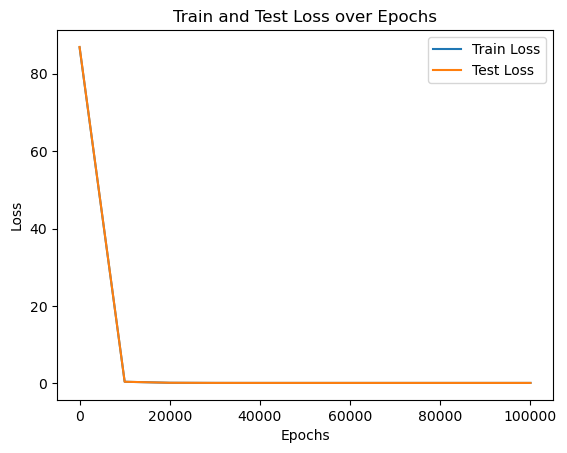

In [24]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

torch.manual_seed(124)

features, targets = pre_f_df.iloc[:, :-1], pre_f_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((12, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-3)

loss_history_train = []
loss_history_test = []

epochs = 100000

# 초기 손실 계산
with torch.no_grad():
    H_train_initial = X_train.matmul(W) + b
    loss_train_initial = torch.mean((y_train - H_train_initial) ** 2)
    
    H_test_initial = X_test.matmul(W) + b
    loss_test_initial = torch.mean((y_test - H_test_initial) ** 2)

for epoch in range(1, epochs + 1):
    H_train = X_train.matmul(W) + b
    loss_train = torch.mean((y_train - H_train) ** 2)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        # 훈련 데이터에 대한 손실 값 저장
        loss_history_train.append(loss_train.item())

        # 검증 데이터에 대한 손실 값 계산
        with torch.no_grad():
            H_test = X_test.matmul(W) + b
            loss_test = torch.mean((y_test - H_test) ** 2)
            # 검증 데이터에 대한 손실 값 저장
            loss_history_test.append(loss_test.item())

        print('{:6d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, train_loss: {:.4f}, test_loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss_train.item(), loss_test.item()))

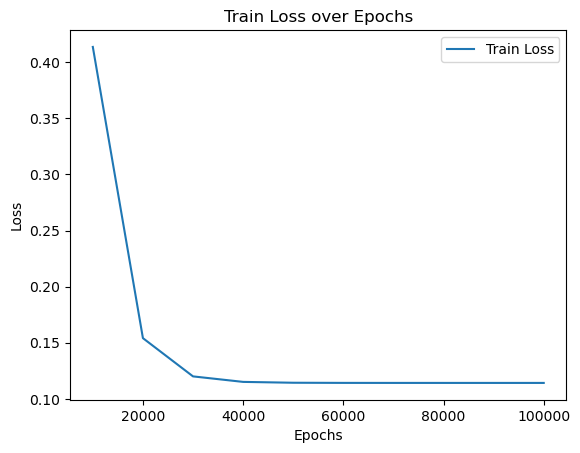

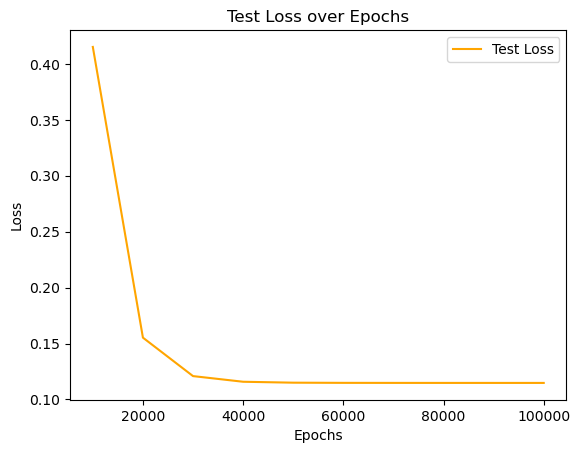

In [27]:
import matplotlib.pyplot as plt

# Train loss history plotting
plt.plot(range(10000, epochs + 1, 10000), loss_history_train, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss over Epochs')
plt.legend()
plt.show()

# Test loss history plotting
plt.plot(range(10000, epochs + 1, 10000), loss_history_test, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.legend()
plt.show()